# Project 6

# Credit Card Fraud Detection

Tasks To Be Performed:
1. Load the dataset using the pandas module.
2. Perform missing value analysis on the dataset.
3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.
4. Using the visualization module, visualize the genuine and fraudulent
transactions using a bar graph.
5. Using the Standard Scaler module, normalize the amount column and
store the new values in the NormalizedAmount column.
6. Split the dataset in train and test set and have a 70:30 split ratio for the
model.
7. Now use a decision tree and random forest model for training on top of the
train set.
8. Compare the predictions of both models using predict().
9. Compare the accuracy of both models using score().
10. Check the performance matrix of both models and compare which
model is having the highest performance.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0-> Normal Transaction
1-> Fraud Transaction

In [14]:
genuine = df[df.Class == 0]
fraud  = df[df.Class == 1]

In [15]:
print(genuine.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1228\3397390027.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("genuine","fraud")


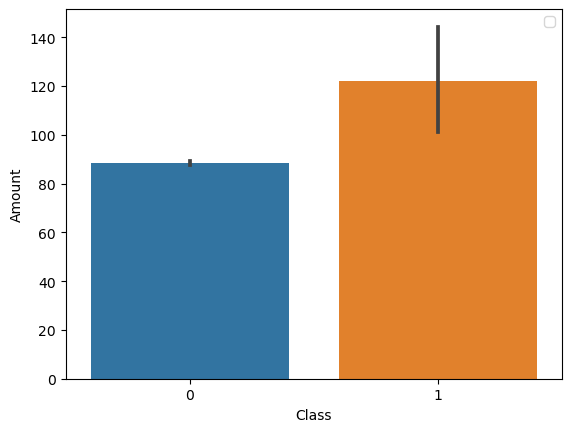

In [71]:
sns.barplot(x = 'Class',
            y = 'Amount',
            data = df)

# Show the plot
plt.legend("genuine","fraud")
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 40)

In [76]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
163176,115718.0,0.231774,0.452511,-0.975254,0.425581,0.448060,-1.151523,1.382659,-0.432714,-0.257365,...,0.376066,0.461773,1.261105,0.313352,-0.081039,-0.837986,-0.151702,0.173637,0.205525,158.90
158471,111299.0,-6.562749,-2.015401,-3.074066,-0.383074,1.857923,-1.213202,2.287910,-1.414720,3.498672,...,-2.016749,-1.118206,0.740558,0.240627,0.327448,0.397470,-0.125795,-2.467269,4.747792,30.00
83953,60103.0,-0.446965,1.462184,0.353631,0.419157,-0.655863,0.019429,-2.028858,-5.332648,-0.733335,...,1.211226,-2.827736,-0.193557,0.324010,0.299362,0.662528,0.134718,-0.082405,0.176626,1.98
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,-0.064780,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00


In [77]:
scaler = StandardScaler().fit(x_train)

In [78]:
print(scaler)

StandardScaler()


In [80]:
scaler.mean_

array([ 8.79159106e+04, -2.29846577e+00,  1.77613017e+00, -3.48534618e+00,
        2.25083095e+00, -1.52046971e+00, -6.81047240e-01, -2.80937345e+00,
        2.17882462e-01, -1.35420272e+00, -2.92004057e+00,  1.93579187e+00,
       -3.24929246e+00, -5.39365653e-02, -3.60581276e+00, -3.43023798e-02,
       -2.12001154e+00, -3.42173226e+00, -1.17221830e+00,  3.51699047e-01,
        1.80005304e-01,  4.12241987e-01, -1.77704688e-02, -2.43147931e-02,
       -4.86544211e-02,  2.84783084e-02,  1.49482349e-02,  9.51985234e-02,
        5.46239900e-02,  1.07408293e+02])

In [81]:
scaler.scale_

array([4.92156298e+04, 5.16537785e+00, 3.56927999e+00, 5.91707236e+00,
       3.28344200e+00, 4.02166471e+00, 1.78755248e+00, 5.69556774e+00,
       4.88935495e+00, 2.25693334e+00, 4.47674362e+00, 2.79695898e+00,
       4.64927370e+00, 1.05747038e+00, 4.69654705e+00, 9.72282192e-01,
       3.54314290e+00, 6.02592733e+00, 2.42923891e+00, 1.30219633e+00,
       1.03210819e+00, 2.97214410e+00, 1.21127883e+00, 1.30270541e+00,
       5.66498449e-01, 6.87008550e-01, 4.66765129e-01, 9.45523290e-01,
       4.48713900e-01, 2.31327707e+02])

In [82]:
scaler.transform(x_train)

array([[ 0.56490366,  0.48984606, -0.37083655, ...,  0.0829581 ,
         0.33629694,  0.22259204],
       [ 0.47511511, -0.82555109, -1.06226793, ..., -2.71010533,
        10.45915435, -0.33462612],
       [-0.56512353,  0.35844437, -0.08795771, ..., -0.18783618,
         0.27189342, -0.45575298],
       ...,
       [ 1.4376955 ,  0.85807969, -0.80290353, ..., -0.09737684,
        -0.22638548, -0.32814181],
       [-0.35508863,  0.6578724 , -0.49038237, ..., -0.04695593,
        -0.06864357, -0.38217771],
       [ 0.64004239,  0.38239785, -0.16798215, ..., -0.2686602 ,
        -0.26155467, -0.3672638 ]])

In [83]:
x_train_scaled = scaler.transform(x_train)

In [84]:
print(x_train_scaled)

[[ 0.56490366  0.48984606 -0.37083655 ...  0.0829581   0.33629694
   0.22259204]
 [ 0.47511511 -0.82555109 -1.06226793 ... -2.71010533 10.45915435
  -0.33462612]
 [-0.56512353  0.35844437 -0.08795771 ... -0.18783618  0.27189342
  -0.45575298]
 ...
 [ 1.4376955   0.85807969 -0.80290353 ... -0.09737684 -0.22638548
  -0.32814181]
 [-0.35508863  0.6578724  -0.49038237 ... -0.04695593 -0.06864357
  -0.38217771]
 [ 0.64004239  0.38239785 -0.16798215 ... -0.2686602  -0.26155467
  -0.3672638 ]]


In [85]:
print(x_train_scaled.mean(axis=0))

[ 1.44419255e-17 -1.20349379e-17  5.77677021e-17  9.62795035e-18
  0.00000000e+00 -7.22096276e-18 -5.05467393e-17 -4.33257766e-17
 -1.20349379e-17 -4.81397517e-17 -5.29537269e-17 -7.70236028e-17
  9.62795035e-17 -2.70786104e-17 -1.15535404e-16  1.23358114e-17
  1.73303106e-16 -6.73956524e-17 -2.40698759e-17  9.62795035e-18
  2.40698759e-18  1.44419255e-17 -3.61048138e-18 -4.81397517e-18
  1.20349379e-17 -8.42445656e-18  2.40698759e-18  1.32384317e-17
 -1.98576476e-17  6.73956524e-17]


In [86]:
print(x_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [22]:
genuine_sample= genuine.sample(n=492)

In [23]:
new_dataset=pd.concat([genuine_sample,fraud],axis=0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56301,47357.0,-1.078902,1.824700,0.499043,0.895330,-0.492811,-0.889534,0.093729,0.674177,-0.869091,...,0.213229,0.501723,-0.067135,0.409143,-0.147406,-0.326857,0.033256,0.100396,1.08,0
92800,64110.0,-1.613405,1.647323,1.365623,-0.503443,0.016369,-0.252960,0.867868,-0.139205,0.844969,...,-0.463970,-0.426233,-0.027993,0.160430,-0.183388,-0.014676,0.022716,-0.539460,8.91,0
140627,83829.0,-2.827999,2.174615,-0.795515,-3.296753,-0.959679,-1.089796,-0.544394,1.565915,0.725928,...,0.159414,0.096896,-0.007924,-0.427550,0.327334,-0.281167,-0.374289,0.027707,7.79,0
49365,44022.0,1.171138,-0.039133,0.979372,0.820066,-0.221879,1.181843,-0.900047,0.419782,0.351957,...,0.257870,0.862578,-0.196327,-1.122629,0.442433,-0.155258,0.092801,0.018359,0.00,0
156013,107031.0,2.124657,-1.702902,-1.441572,-1.596087,-0.718448,0.164261,-1.112927,-0.125663,-0.026304,...,-0.290089,-0.374371,-0.027925,-1.536199,-0.118455,-0.138446,-0.046573,-0.063789,130.52,0


In [25]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [27]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95197.623984,0.002249,-0.037242,0.027590,-0.035239,0.065861,0.037386,-0.042196,0.009862,-0.049570,...,0.002212,-0.012401,-0.017541,0.004262,0.002148,0.005005,-0.014259,-0.010155,0.016677,84.470935
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
x =new_dataset.drop(columns= 'Class',axis=1 )
y =new_dataset['Class']

In [29]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
56301    47357.0 -1.078902  1.824700  0.499043  0.895330 -0.492811 -0.889534   
92800    64110.0 -1.613405  1.647323  1.365623 -0.503443  0.016369 -0.252960   
140627   83829.0 -2.827999  2.174615 -0.795515 -3.296753 -0.959679 -1.089796   
49365    44022.0  1.171138 -0.039133  0.979372  0.820066 -0.221879  1.181843   
156013  107031.0  2.124657 -1.702902 -1.441572 -1.596087 -0.718448  0.164261   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(y)

56301     0
92800     0
140627    0
49365     0
156013    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 0)

In [42]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [43]:
model= LogisticRegression()

In [44]:
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
x_train_prediction = model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [46]:
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 0.9428208386277002


In [47]:
x_test_prediction = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [48]:
print('Accuracy on Training data:', test_data_accuracy)

Accuracy on Training data: 0.9035532994923858


In [49]:
confusion_matrix(x_test_prediction,y_test)

array([[95, 15],
       [ 4, 83]], dtype=int64)

6.Split the dataset in train and test set and have a 70:30 split ratio for the model.
7.Now use a decision tree and random forest model for training on top of the train set.
8.Compare the predictions of both models using predict().
9.Compare the accuracy of both models using score().
10.Check the performance matrix of both models and compare which model is having the highest performance.


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [52]:
model= DecisionTreeClassifier()

In [53]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
x_train_prediction = model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [55]:
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 1.0


In [56]:
x_test_prediction = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [57]:
print('Accuracy on Training data:', test_data_accuracy)

Accuracy on Training data: 0.8918918918918919


In [58]:
confusion_matrix(x_test_prediction,y_test)

array([[133,  18],
       [ 14, 131]], dtype=int64)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [61]:
model= RandomForestClassifier()

In [62]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
x_train_prediction = model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [64]:
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 1.0


In [65]:
x_train_prediction = model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [66]:
print('Accuracy on Training data:', test_data_accuracy)

Accuracy on Training data: 0.8918918918918919


In [67]:
confusion_matrix(x_test_prediction,y_test)

array([[133,  18],
       [ 14, 131]], dtype=int64)

The Accuracy_score and confusion_matrix of both the mdel are near about same